<a href="https://colab.research.google.com/github/tony45678/tonyyoon/blob/master/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries 

In [0]:

import cmath 
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


# 1. Plot the training Data

In [0]:
def load_data(path, header):
    data = pd.read_csv(path, header=header)
    return data

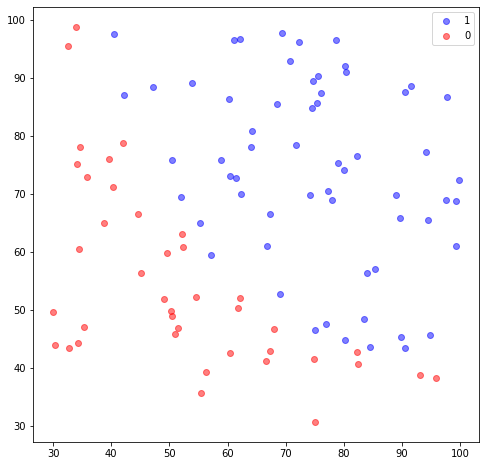

In [533]:
if __name__ == "__main__":
    data = load_data("data.txt",None)

    x = data.iloc[:, :1]
    y = data.iloc[:, -1]

    label_1 = data.loc[y == 1]
    label_0 = data.loc[y == 0]


    plt.figure(figsize=(8, 8))
    plt.scatter(label_1.iloc[:, 0], label_1.iloc[:, 1], alpha=0.5, c ='b')
    plt.scatter(label_0.iloc[:, 0], label_0.iloc[:, 1], alpha=0.5, c ='r')
    plt.legend(['1','0'])
    plt.show()

# Train Model

In [0]:
model = LogisticRegression()      

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1)     #splitting the data for the test data and train data

In [503]:
 model.fit(x_train, y_train)     #fitting the data to the logisticRegression Function

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [504]:
model.score(x_train,y_train)   #Got the score of 81.3% 

0.8133333333333334

In [505]:
print(model.intercept_, model.coef_,model.n_iter_)  #shows the inteception, coefficients, iterations of the train model.s

[-4.5560691] [[0.08123615]] [22]


# 2. Plot the estimated parameters

In [0]:
def sigmoid(z):                                #sigmoid function
    return 1 / (1 +np.exp(-z))

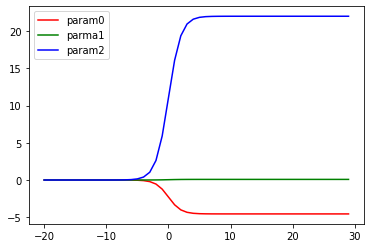

In [413]:
x = np.arange(-20., 30.,1)
theta0 = -4.5560691
theta1 = 0.08123615
theta2 = 22
param0 = sigmoid(x)*theta0
param1 = sigmoid(x)*theta1
param2 = sigmoid(x)*theta2
plt.plot(x,param0,color = 'red')
plt.plot(x,param1,color = 'green')
plt.plot(x,param2,color = 'blue')
plt.legend(['param0','parma1','param2'])
plt.show()

# 3. Plot the training error

In [0]:
def costFunction(theta, x, y):

    m=len(y)
    
    predictions = sigmoid(np.dot(x,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    grad = 1/m * np.dot(x.transpose(),(predictions - y))
    
    return cost[0] , grad

In [0]:
def gradientDescent(x,y,theta,alpha,num_iters):

    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,x,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

# 4. Plot the obtained classifier